<a href="https://colab.research.google.com/github/kiiran7781/EDA/blob/main/EDA_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLORATORY DATA ANALYSIS ON TITANIC DATASET

In [ ]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

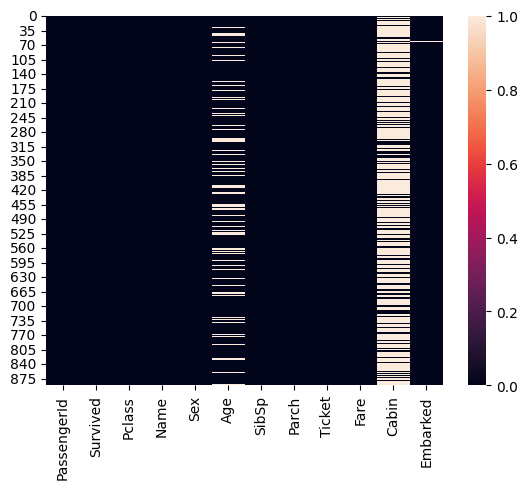

In [ ]:
sns.heatmap(df.isnull())

<Axes: >

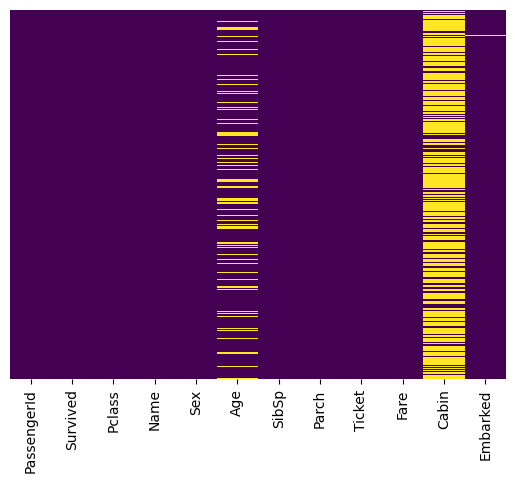

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

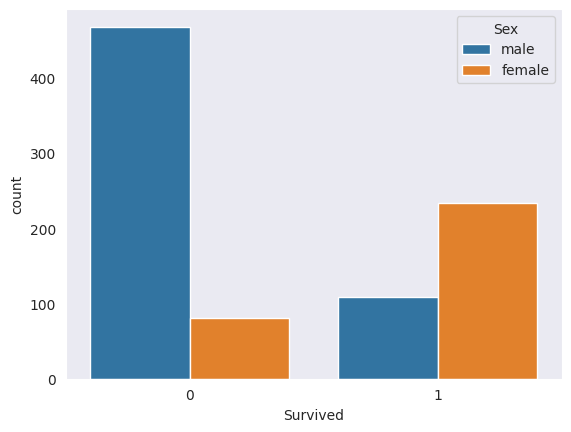

In [ ]:
sns.set_style('dark')
sns.countplot(x='Survived',hue='Sex',data=df)

<Axes: xlabel='Survived', ylabel='count'>

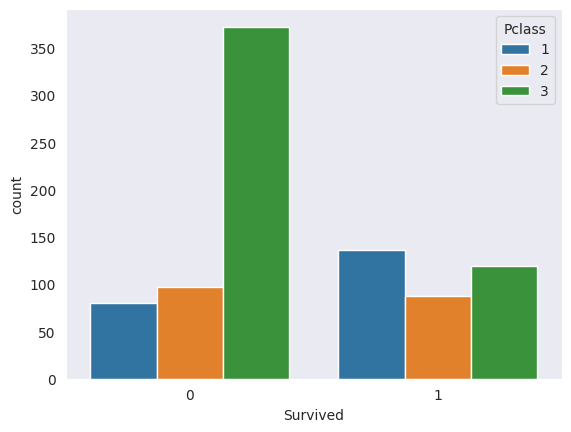

In [ ]:
sns.set_style('dark')
sns.countplot(x='Survived',hue='Pclass',data=df)

<ipython-input-25-b5212cb402f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde=False,bins=90)


<Axes: xlabel='Age'>

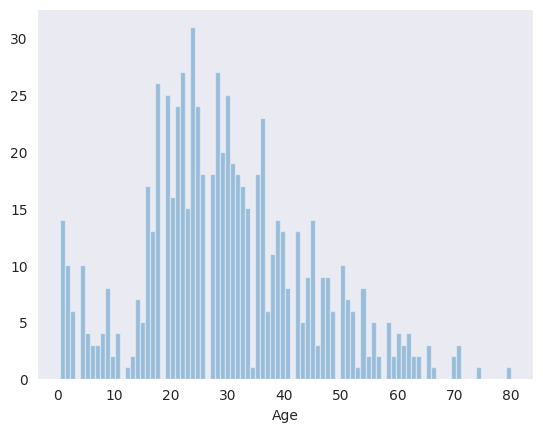

In [ ]:
sns.distplot(df['Age'].dropna(),kde=False,bins=90)          #can use dist or hist(histogram)

<Axes: >

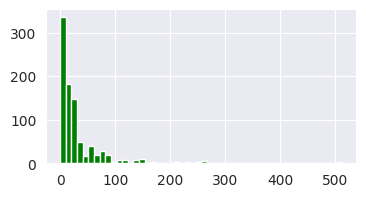

In [ ]:
df['Fare'].hist(color='green',bins=50,figsize=(4,2))

<Axes: xlabel='Pclass', ylabel='Age'>

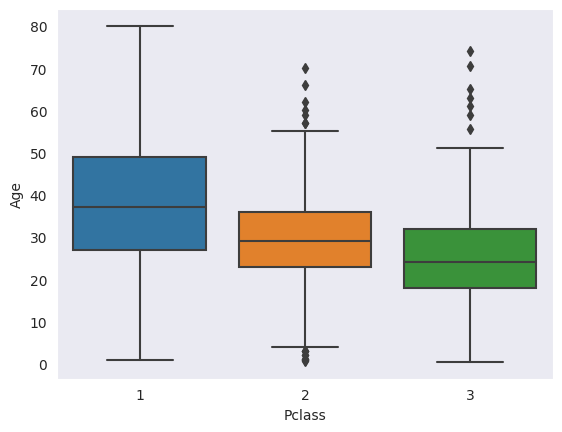

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [ ]:
def impute_age(cols):                                                #TO REMOVE NULL VALUES
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):
      if Pclass==1:
         return 37                                      # 37 IS THE MEAN VALUE FROM PCLASS=1 .....GOT THE MEAN VALUE FROM PREV BOX PLOT
      elif Pclass==2:
         return 29
      else:
         return 24
    else:
       return Age

In [ ]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

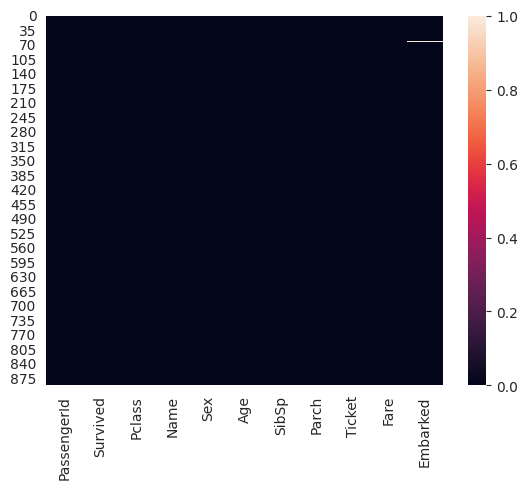

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.drop('Cabin',axis=1,inplace=True)           ''' showing error cuz the column is dropped
                                               and if we execute again it will show error
                                               cuz the col cabin does not exist '''

KeyError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   male         891 non-null    uint8  
 9   Q            891 non-null    uint8  
 10  S            891 non-null    uint8  
 11  male         891 non-null    uint8  
 12  Q            891 non-null    uint8  
 13  S            891 non-null    uint8  
 14  male         891 non-null    uint8  
 15  Q            891 non-null    uint8  
 16  S            891 non-null    uint8  
dtypes: float64(2), int64(5), object(1), uint8(9)
memory usage: 63.6+ KB


In [ ]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
df=pd.concat([df,Sex,Embarked],axis=1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,male,Q,S,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,1,1,0,1,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,1,0,0,1,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1,0,0,1,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,1,0,1,1,0,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,NaN,1,0,1,1,0,1,1,0,1,1,0,1
887,888,1,1,19.0,0,0,30.0000,B42,0,0,1,0,0,1,0,0,1,0,0,1
888,889,0,3,NaN,1,2,23.4500,NaN,0,0,1,0,0,1,0,0,1,0,0,1
889,890,1,1,26.0,0,0,30.0000,C148,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64